In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test,y_test)= mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image = X_train[0]

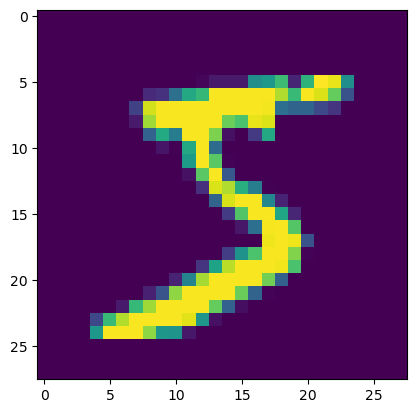

In [7]:
plt.imshow(single_image)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train_to_cat = to_categorical(y_train, num_classes=10)

In [11]:
y_train_to_cat.shape

(60000, 10)

In [12]:
y_train_to_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_train_to_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_test_to_cat = to_categorical(y_test, num_classes=10)

In [15]:
y_test_to_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test_to_cat.shape

(10000, 10)

In [17]:
y_test_to_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
# reshape the image for show the batch_size, width, height, color_channel
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(4,4), 
                 padding="same", 
                 activation="relu", 
                 input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),
                    padding="same"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(patience=2, verbose=1, mode="min", restore_best_weights=True)

In [25]:
model.fit(X_train, y_train_to_cat,validation_data=(X_test, y_test_to_cat), epochs=20, callbacks=[early_stop])

Epoch 1/20


1875/1875 [==============================] - 25s 13ms/step - loss: 0.1410 - accuracy: 0.9576 - val_loss: 0.0511 - val_accuracy: 0.9819
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0459 - accuracy: 0.9863 - val_loss: 0.0408 - val_accuracy: 0.9852
Epoch 3/20
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0448 - val_accuracy: 0.9857
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0430 - val_accuracy: 0.9862
Epoch 4: early stopping


In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
losses = metrics[["loss", "val_loss"]]

<Axes: >

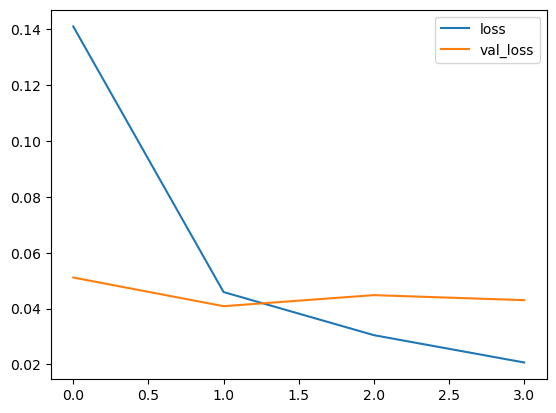

In [28]:
losses.plot()

In [29]:
prediction = np.argmax(model.predict(X_test)>0.5, axis=1)

313/313 [==============================] - 2s 6ms/step


In [30]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



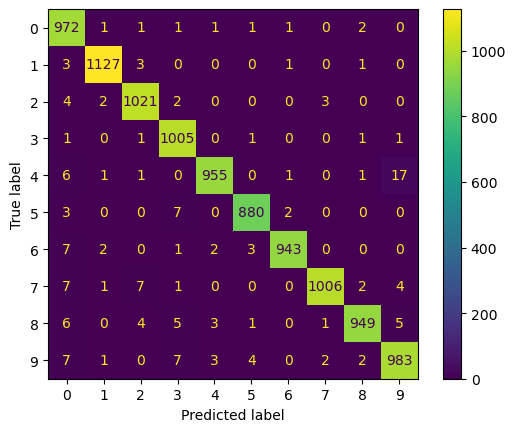

In [33]:
cm = confusion_matrix(y_test, prediction)

dist = ConfusionMatrixDisplay(cm)

dist.plot()

In [34]:
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [35]:
mynumber = X_test[0]

In [36]:
np.argmax(model.predict(mynumber.reshape(1, 28,28, 1))>0.5, axis=1)

1/1 [==============================] - 0s 27ms/step


array([7], dtype=int64)

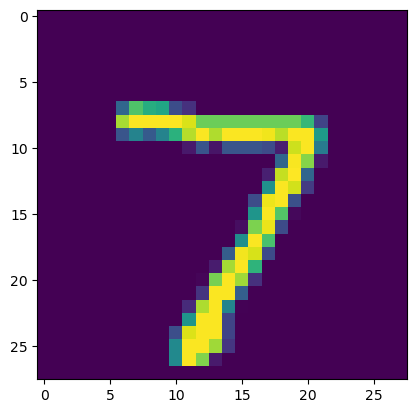

In [38]:
plt.imshow(mynumber.reshape(28,28))